# PCA for shape generation

**Mandatory assignment 2**
This is the second mandatory assignment, to be submitted on LearnIT as a Jupyter Notebook containing your implementation and notes by the deadline specified on [LearnIT](https://learnit.itu.dk/)
. Details on the submission process can be found [here](https://iml.itu.dk/01-about_the_course/01-AboutTheCourse.html)
.
This Assignment contains two parts. Part one is be feasible **after lecture 11**, and the second part **after lecture 12**.
The assignment applies PCA to generate face shapes. The objective is to explore the relationship between points in the latent space and their corresponding representations in the data space.


**Refresh**
The eigenvalue $\lambda_i$ is equal to the variance $\sigma_i^2$ along the direction of its eigenvector $v_i$. This equivalence allows us to use $\lambda_i$ and $\sigma_i^2$ interchangeably. Furthermore observe that the variance is given by $\sigma^2$ and hence the  standard deviation is given by $\sigma$ (standard deviation).
That is:

$$\lambda_i = \sigma_i^2$$
and therefore:

$$\sigma_i = \sqrt{\lambda_i}$$

<div style="float: none; width: 100%; justify-content: start" class="block is-clearfix">


<article class="message">
    <div class="message-body">
        <strong>Overview of mandatory tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#prep">Task 1: Data inspection</a>
            </li>
            <li>
            <a href="#get_pca">Task 2: Evaluate Principal compoenets</a>
            </li>
            <li>
            <a href="#gen">Task 3: Base face</a>
            </li>
            <li>
            <a href="#gen_reflect">Task 4: Base face reflections </a>
            </li>
            <li>
            <a href="#c">Task 5: Investigate variations in latent space</a>
            </li>
            <li>
            <a href="#interpolate">Task 6: Interpolation between two faces</a>
            </li>
            <li>
            <a href="#reflect">Task 7: Reflection</a>
            </li>
            <li>
            <a href="#correlation_eigen">Task 8: Eigenvalues and eigenvectors of correlat…</a>
            </li>
            <li>
            <a href="#Dimensionality_red">Task 9: Out of distribution generation</a>
            </li>
        </ul>
    </div>
</article>



</div>


**Important**
Solve the Introduction to PCA
 exercise part 1 **before starting on part 1 of this assignment**. 

# Part 1
## Data
The dataset used for the assigment consist of 120 landmarks (2D points) of faces (data space). A face consists of 73 (x,y)-coordinate pairs, i.e. 146 featues in total.

---
**Task 1 (easy): Data inspection👩‍💻**
1. Run the cell below to load libraries, the data and to  visualize the first 6 sample face shapes.


---

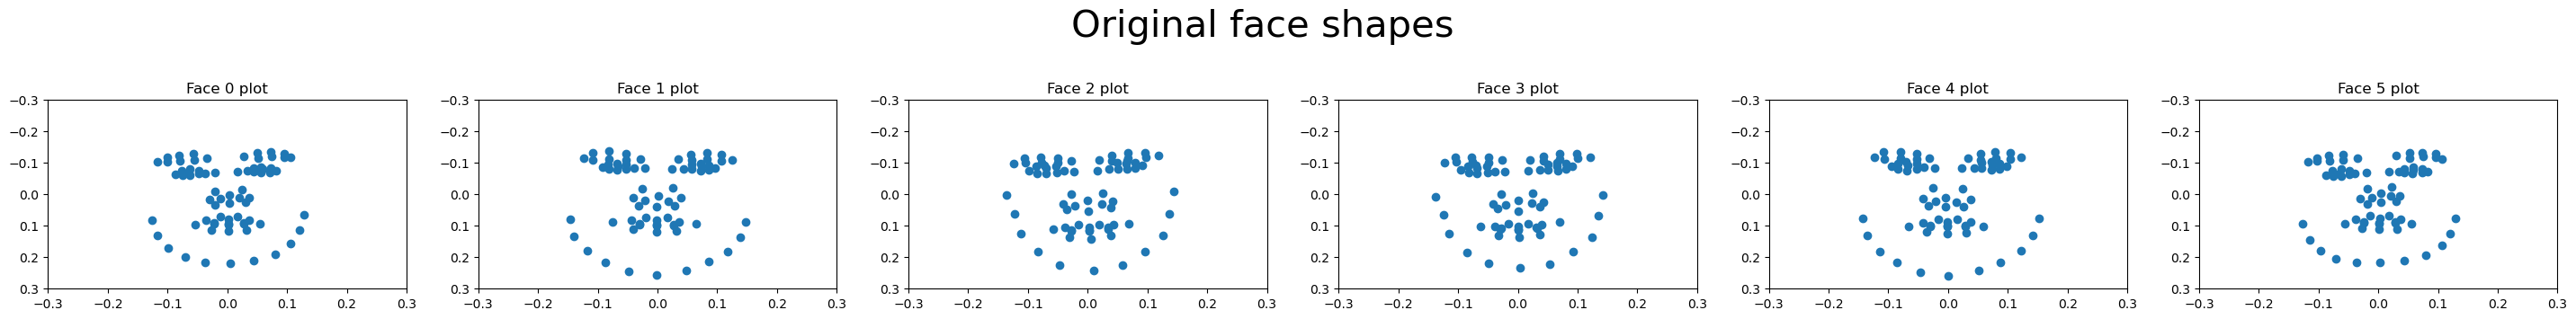

In [2]:
## Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy
from pca_utils import *
import os
from glob import glob

path = './db/'
shapes, _ = face_shape_data(path)

plot_many_faces(shapes[:6],"Original face shapes");

## PCA implementation
The following tasks are about using the implementation of PCA from the in-class exercise on the face shape dataset. 

---
**Task 2 (easy): Get principal compontents👩‍💻**
1. Complete the `get_principal_components`
 function so that it returns all principal components `comp`
, eigenvalues `val`
 and mean vector `mu`
, given the dataset `shapes`
.
2. Use the `get_principal_components`
 function to calculate the principal components (`comp`
) for the face dataset.
3. Implement the function `transform_to_latent_space`
  according to the comments in the cell below using  $\mathbf{a} = \mathbf{\Phi_k}^\top(\mathbf{x}-\mathbf{\mu})$ .
4. Implement the function `transform_from_latent_space`
  according to the comments in the cell below using $x  = \mathbf{\Phi_k} \mathbf{a} + \mathbf{\mu}$ . 
5. Run the cell below to map $6$ face shapes to the latent space and back to the original data space. The `plot_many_faces`
 function is used to display both the original and the restored face shapes.
6. Visually inspect the figures and describe the reconstruction error.


---

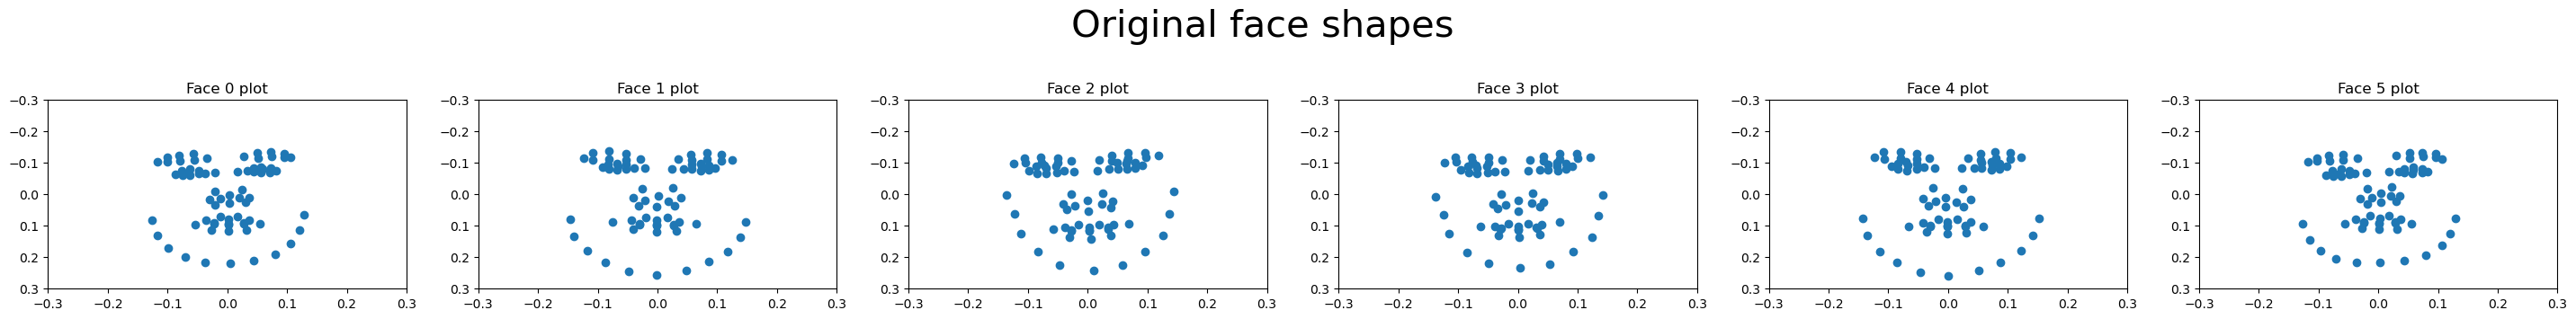

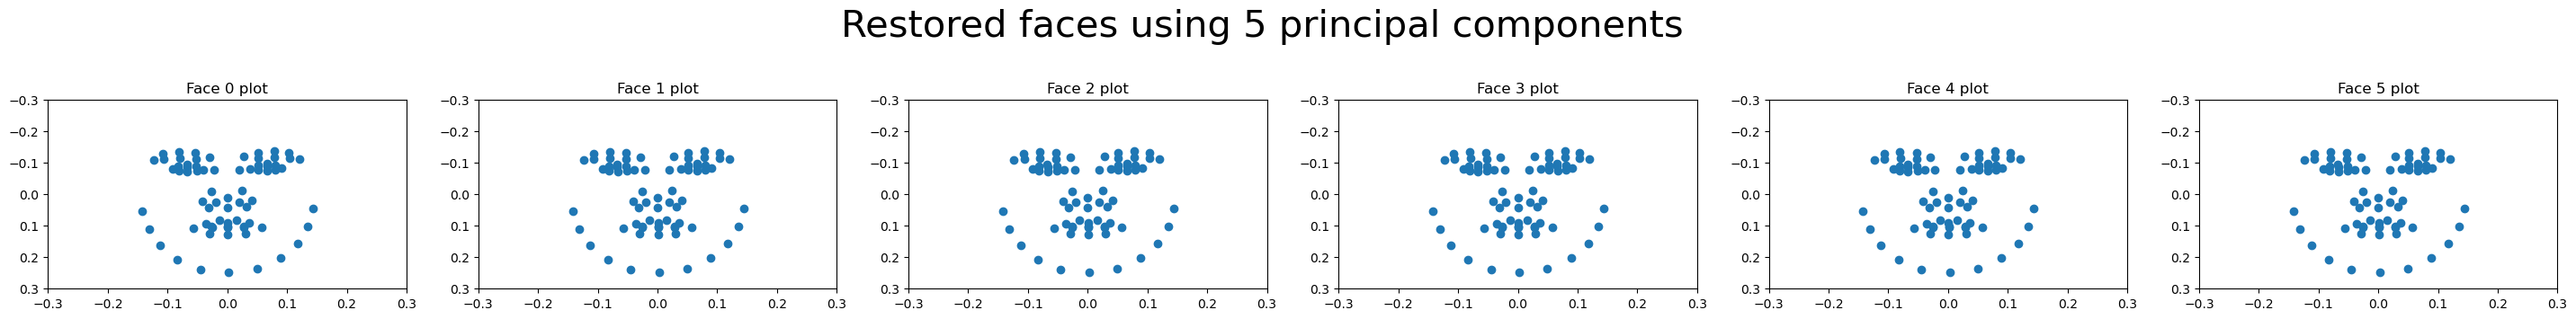

In [3]:
# 1
def get_principal_components(X):
    """Calculates principle components for X.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.

    Returns:
        Tuple (components, eigenvalues, mu) where components is a DxD matrix of
        principle components, eigenvalues is a D-element vector of
        corresponding eigenvalues, and mu is a D-element array containing the mean
        vector.
    """
    # Copy your PCA implementation to here.
    mu = np.mean(X, axis=0)
    VeryMeanX = X - mu
    cov_matrix = np.cov(VeryMeanX, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) 
    return eigenvectors, eigenvalues, mu


# 2, 3 and 4
# Get the principal components for the dataset and transform the faces to feature space.
comp, val, mu = get_principal_components(shapes)

# For future proofing and good fortune
accuracies = []
accuracies= []

# write code for finding the cumulative proportional variance here

# selecting 5 components 
n_components = 5


# 5
def transform_to_latent_space(X, principle_components, mu):
    """Transforms X to an k-dimensional space where k is the number of
    principle_components.

    Args:
        X: The dataset. An NxD array were N are the number of samples and D are
        the number of features.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A D-element array containing the mean vector.

    Returns:
        A Nxk array describing the transformed data.
    """
    return (X-mu)@principle_components

    
# 6  
def transform_from_latent_space(v, principle_components, mu):
    """Reverses the dimensionality reduction of v, a Nxk matrix where
    k is the number of principle components. The result is a NxM matrix.

    Args:
        v: The transformed dataset with size Nxk.
        principle_components: An Dxk matrix containing the principle
        components.
        mu: A Mx1 matrix containing the mean vector.

    Returns:
        An NxD array reconstruction of the original feature vectors X.
    """
    return v@principle_components.T+mu

    
# 7     
used = comp[:, :n_components]

# transforming and reconstructing the 6 first faces in the dataset
plot_many_faces(shapes[:6],"Original face shapes")
transformed = transform_to_latent_space(shapes[:6], used, mu)
restored = transform_from_latent_space(transformed, used, mu)
plot_many_faces(restored,"Restored faces using 5 principal components")

### 2.6 Answer:
The reconstructed face-shapes seem to be a bit squashed and smoothed. E.g. looking at the recosntructed face 2 you can see that the chin has a more clean curve than the original


---
**Task 3 (easy): Evaluate Principal compoenets💡**
1. How many components are needed to retain $50\%$, $60\%$, $80\%$, $95\%$ of the total variation?
2. Seting $k=5$ components. How much of the total variance is retained?
3. Visually inspect the figures and describe the reconstruction error.


---

In [4]:
pc_values = val
sortedeigenvaluesI = np.argsort(pc_values)[::-1]
sorted_eigenvalues = np.array([pc_values[x] for x in sortedeigenvaluesI])
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

targets = [0.5, 0.6, 0.8, 0.95]
index = [-1, -1, -1, -1]
for i, variance in enumerate(cumulative_variance_ratio):
    for j, target in enumerate(targets):
        if variance >= target and index[j] == -1:
            index[j] = i
    if index[-1] != -1:
        break
print(f"Index of last variance needed for reaching target:\n\tTargets: {targets}\n\tIndexes: {index}")
print("Final cumulative variance:", cumulative_variance_ratio[index])

print(np.cumsum(sorted_eigenvalues)[4])

Index of last variance needed for reaching target:
	Targets: [0.5, 0.6, 0.8, 0.95]
	Indexes: [1, 1, 3, 7]
Final cumulative variance: [0.64909603 0.64909603 0.82835089 0.95256778]
0.007511996886010563


In [5]:
#Write your reflections here...
"""
1.
50% requires the first two compoenets
60% requires the first two compoenets
80% requires the first four compoenets
95% requires the first eight compoenets

2.
We retained '0.007511996886010565' much of the total variance

3.
look at reflections above

"""

"\n1.\n50% requires the first two compoenets\n60% requires the first two compoenets\n80% requires the first four compoenets\n95% requires the first eight compoenets\n\n2.\nWe retained '0.007511996886010565' much of the total variance\n\n3.\nlook at reflections above\n\n"


**Important**
Solve the Introduction to PCA
 exercise part 2 **before starting on part 2 of this assignment**. 

# Part 2
## Using PCA for shape generation
The principal components can be used to generate new samples $\mathbf{x}$ in data space by transforming a point in latent space according to 
$$\mathbf{x} = \Phi_{k} a + \mu$$
 where $\Phi_{k}$ is the matrix of k eigenvectors, $\mathbf{a}\in\mathbb{R}^{k}$ is a vector in latent space, and $\mu\in\mathbb{R}^{D}$ is the mean vector of the original data features in  the data space.

$$

{\Phi_k} = \begin{bmatrix} | & | & & | \\ {v}_1 & {v}_2 & \cdots & {v}_k \\ | & | & & | \end{bmatrix}

$$
The variance of the data in a given direction can be used to constrain the values of the elements of the vector $\mathbf{a}$ in latent space, assuming that the data follows a (multivariate) normal distribution. In a multivariate normal distribution each direction $v_i$ is also normally distributed. Each element $a_i$ can be constrained to be within the observed variance in direction $v_i$. The variance $\sigma_i^2$ in the direction of $v_i$ is given by the eigenvalue $\lambda_i$, so the standard deviation is  $\sigma_i = \sqrt{\lambda_i}$.
In a 1D normal distribution (with mean $\mu$ and standard deviation $\sigma$), the area under the Gaussian curve between $\pm 3\sigma$ contains $99.7\%$ of the data (see [Figure 1](#normal) ). Thus, constraining each element $a_i$ to the interval $[-3\sigma_i, 3\sigma_i]$ will cover $99.7\%$ of the variance in the direction of $v_i$. 
<div class="has-text-centered">
<figure class="image is-inline-block" id="normal">

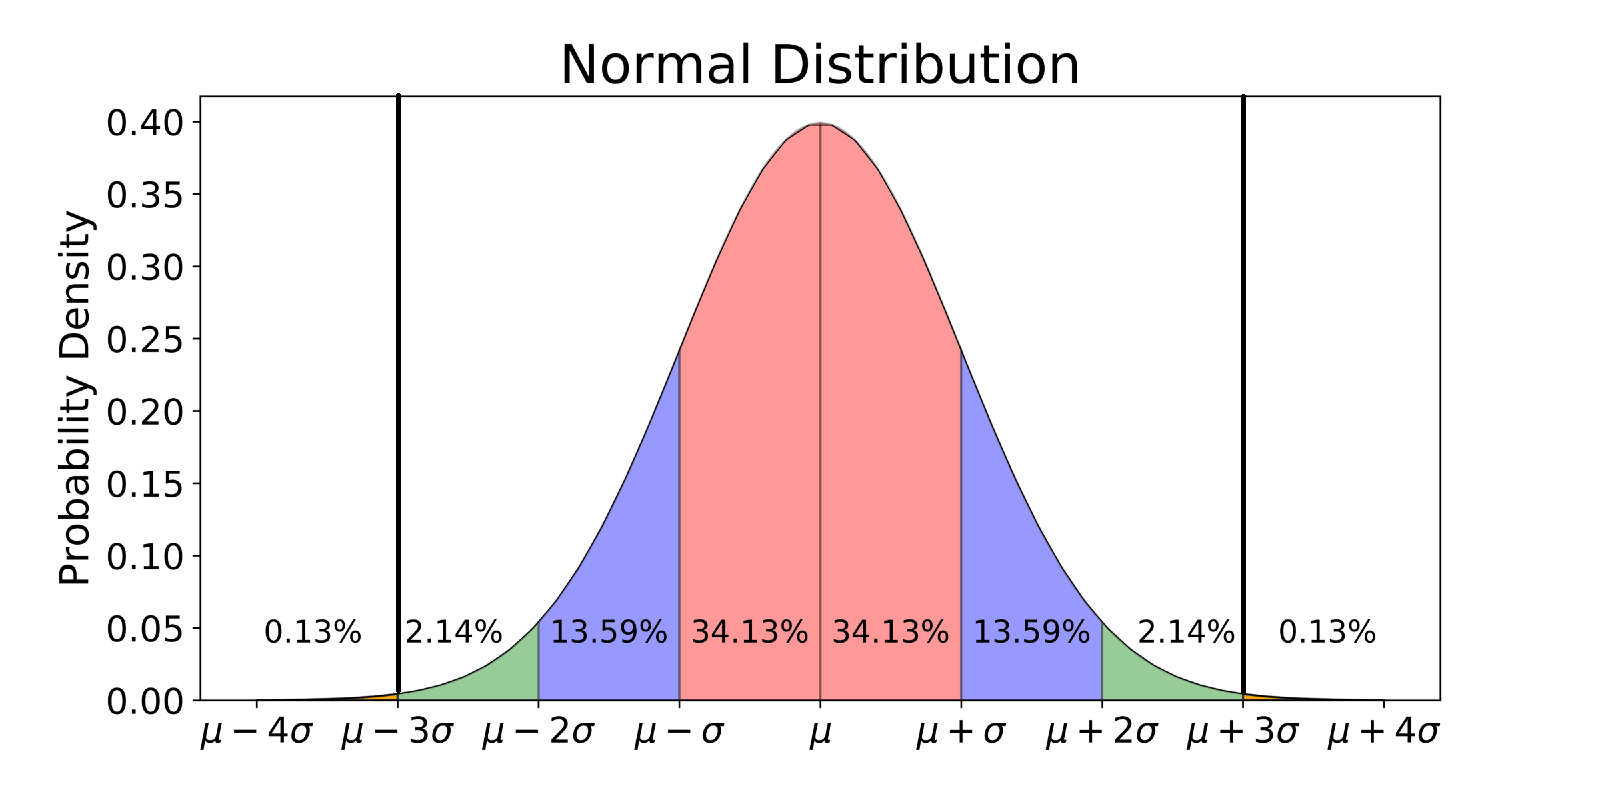

<figcaption class="figure-caption has-text-centered">Figure 1: Illustration of a normal distribution. The vertical lines mark the region covering $99.7\%$ of the variance. The shaded regions indicate the
area of the distribution covered by 1, 2, 3, and 4, standard deviations
($\sigma$) respectively.
</figcaption>
</figure>
</div>

---
**Task 4 (medium): Base face👩‍💻**
1. **Generate vectors:** run the cell below to create the zero vector in latent space, i.e. $\mathbf{a} = [0, 0, \dots, 0]\in\mathbb{R}^5$.
2. **Shape generation:** use $\mathbf{x} = \mathbf{\Phi} \mathbf{a} + \mathbf{\mu}$ to generate a face (vector in real space) from the vector $\mathbf{a}$. Use the `plot_face`
 function to visualise the generated face.
3. Change the elements of $\mathbf{a}$ to the values below, where $\lambda_i$ is the i-th eigenvalue and plot the resulting shapes for each modification:    - $\mathbf{a} = [\sqrt{\lambda_1},0, 0, 0, 0]$ $\in\mathbb{R}^5$? 
    - $\mathbf{a} = [0,-3\sqrt{\lambda_2}, 0, 0, 0]$ $\in\mathbb{R}^5$?




---

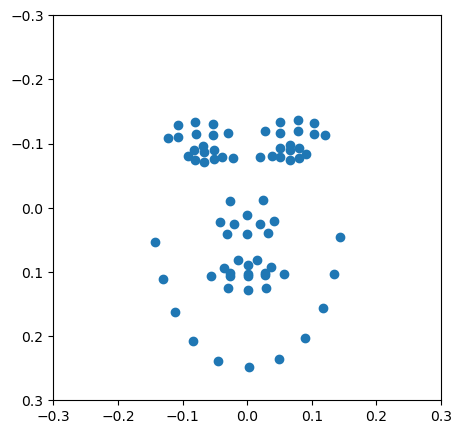

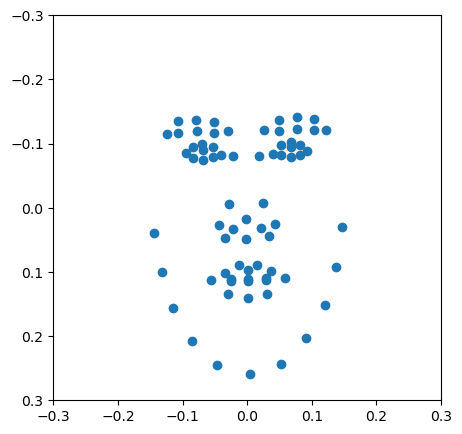

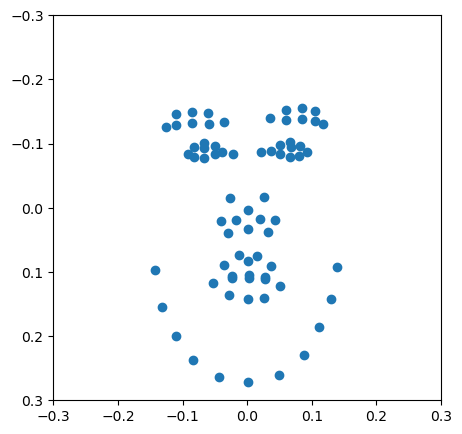

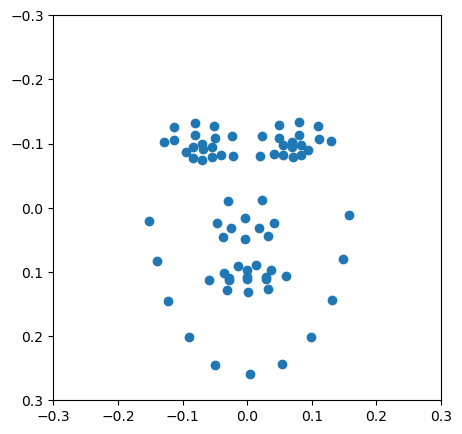

In [15]:
a = np.array([0,0,0,0,0])

# Write your implementation here.

sortedVectors = comp[:, sortedeigenvaluesI[0]]
for x in sortedeigenvaluesI[1:]:
    sortedVectors = np.c_[sortedVectors, comp[:, x]]


high_five_phi = sortedVectors[:, :5]
new_new_face_x = (high_five_phi@a) + mu
plot_face(new_new_face_x)

new_new_a = [np.sqrt(sorted_eigenvalues[0]), 0, 0, 0, 0]
new_newest_new_a = [0, -3*np.sqrt(sorted_eigenvalues[1]), 0, 0, 0]

# define face maker to make face
face_maker = lambda x: (high_five_phi@x) + mu

plot_face(face_maker(new_new_a))
plot_face(face_maker(new_newest_new_a))

# Just testing and having fun don't look at this TA please and thank you
face_off = lambda y: plot_face(face_maker(y))

new_fun_a = [np.sqrt(sorted_eigenvalues[0]),
             np.sqrt(sorted_eigenvalues[1]),
             np.sqrt(sorted_eigenvalues[2]),
             np.sqrt(sorted_eigenvalues[3]),
             np.sqrt(sorted_eigenvalues[4])]

face_off(new_fun_a)



---
**Task 5 (medium): Base face reflections 💡**
1. Use $\mathbf{x} = \Phi_{k} a + \mu$ to explain what the vector $a \in R^5$ represents if     - $\mathbf{a}= [0,0,0,0,0]$?
    - $\mathbf{a} = [\sqrt{\lambda_1},0, 0, 0, 0]$? 
    - $\mathbf{a} = [0,-3\sqrt{\lambda_2}, 0, 0, 0]$?


2. Describe what face is generated and why.


---

In [ ]:
# Write your reflections here

"""
1. 
0's - All zeroes would be the middle of the normal distruction so the most normal of normal faces (makes sense when you look at the face)
---
lambda 1 zeros - in this case we are taking 1 standard devition away from center in the postive direction, on the first principal component this will 
produce a slightly different face.
---
lambda 2 times -3 - This will take 3 standard devitions in the negative direction on the second principal component this will give us a even more
messed up face
\n\t\t\t

2. the more devition we add to the components the more we change the face depending on the component we change. For the first component we seem to get a 
more spicky chin/longer face. For the second component we seem to be squishing the facial features together on the y axis.

"""

## Investigating principal components
The following tasks are about investigating properties of principal components.

---
**Task 6 (medium): Investigate variations in latent space👩‍💻**
1. **Varying the 1st component:** Let $\mathbf{a} \in \mathbb{R^5}$ be a vector in the latent space. Generate 5 different vectors where only the first element, $a_1$, varies, while the remaining elements, $a_2, a_3, a_4, a_5$, are set to 0. Use `np.linspace`
 to generate 5 evenly spaced values for $a_1$ in the interval $[-3\sigma_1, 3\sigma_1]$. For each value of $a_1$, generate a corresponding face and display all 5 faces in a plot. 

2. **More components:** Do the same for each of the remaining four components, i.e. $a_2$-$a_5$ leaving the others as 0. 

3. **Component analysis:** Describe how each principal component changes the face shape (for example, the first component may change the length of the face). 



---

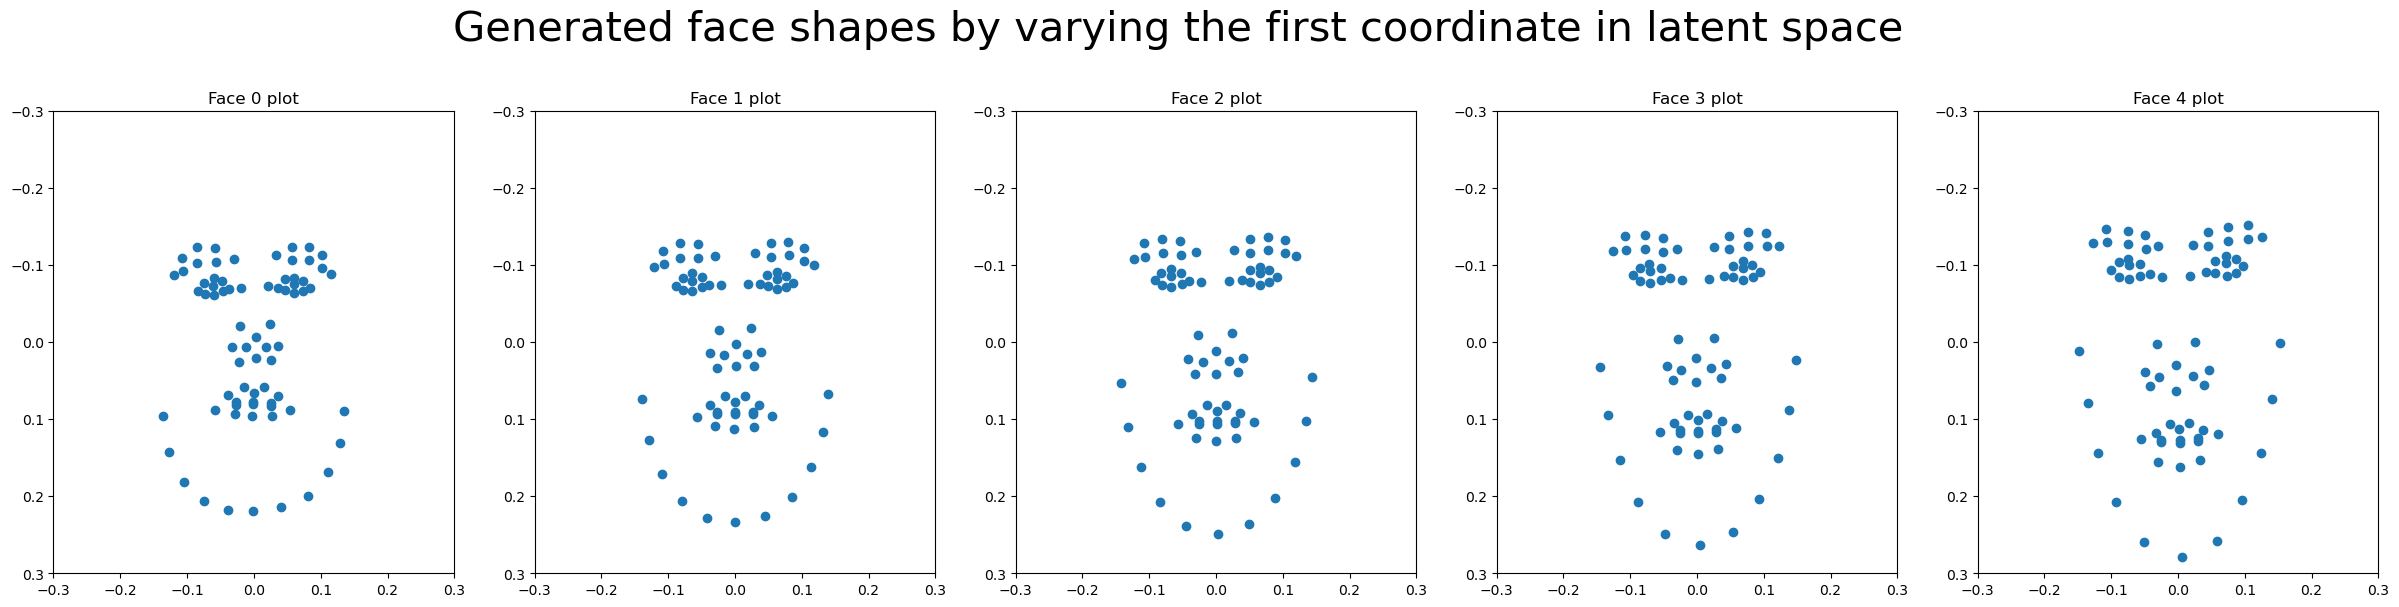

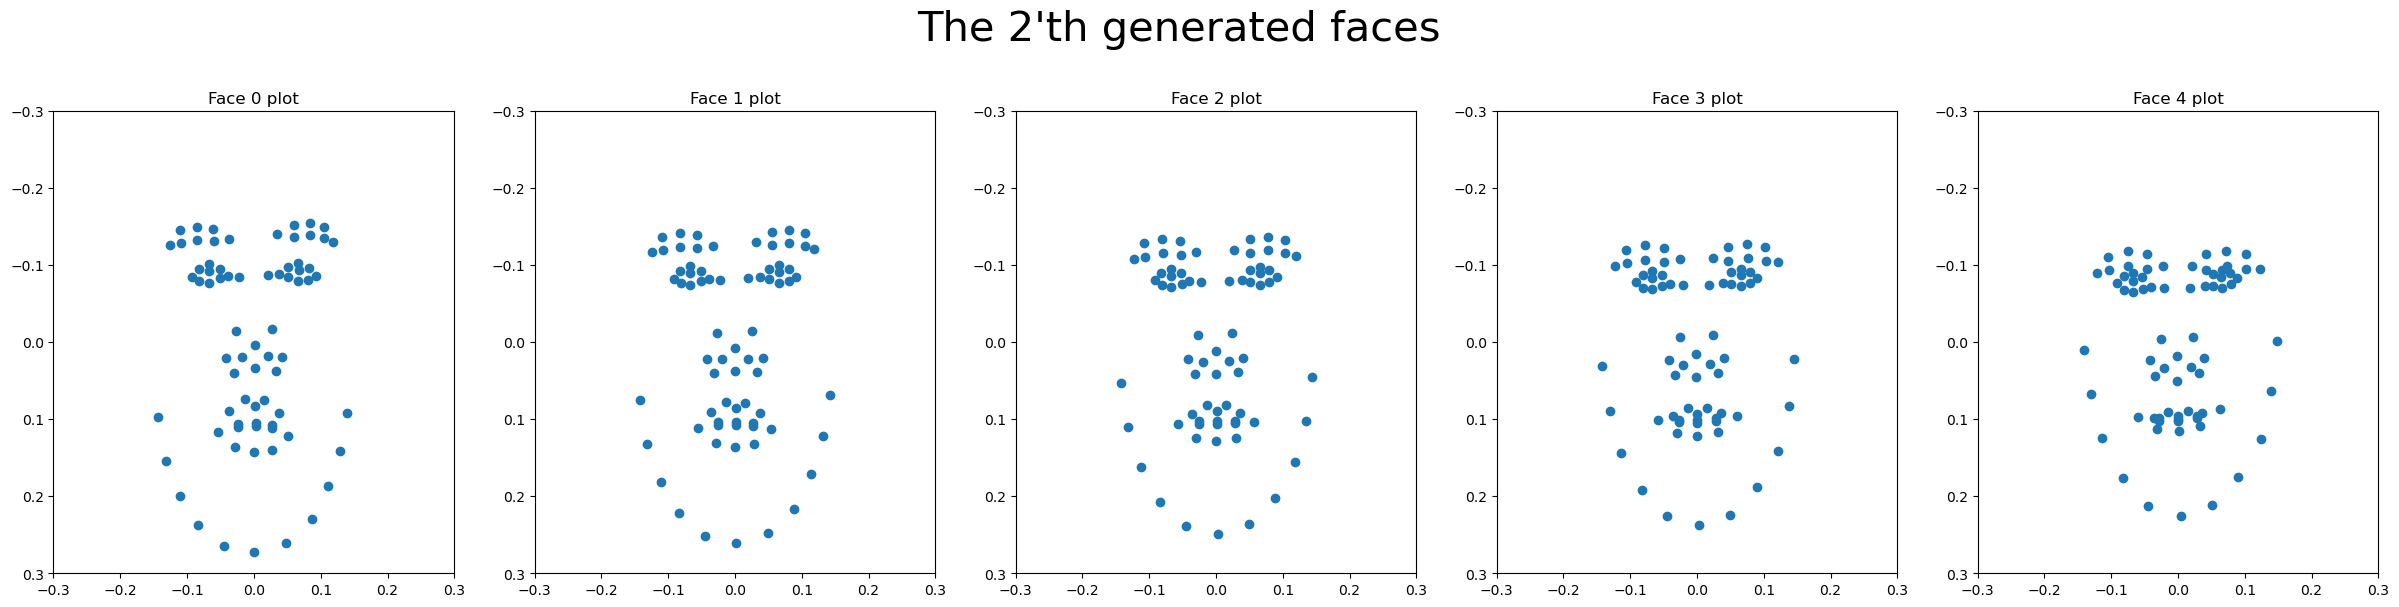

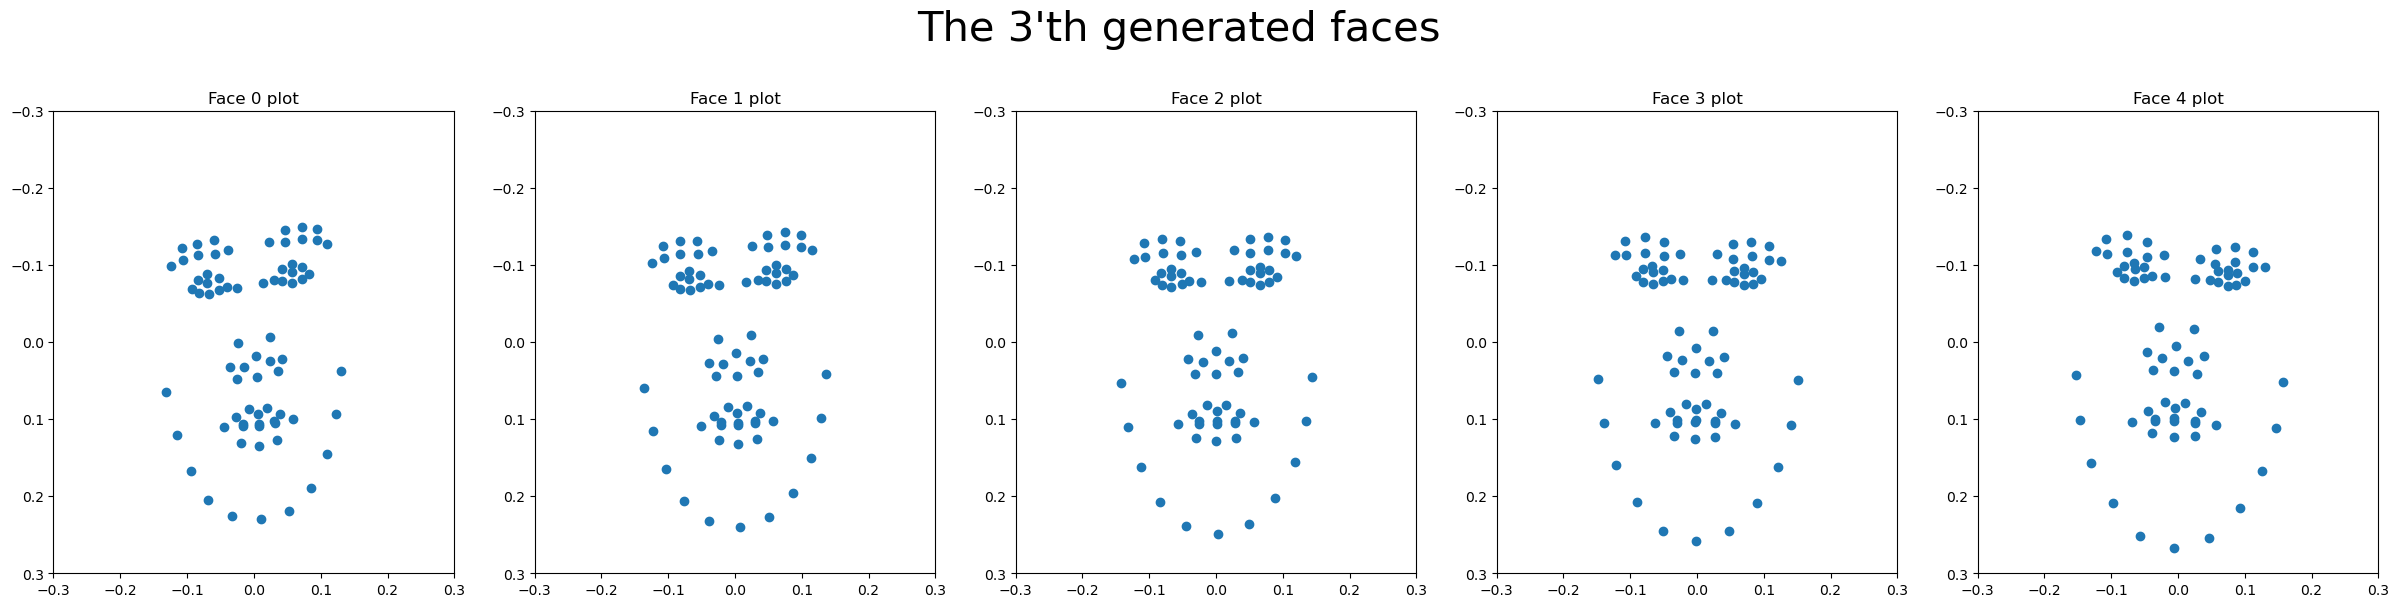

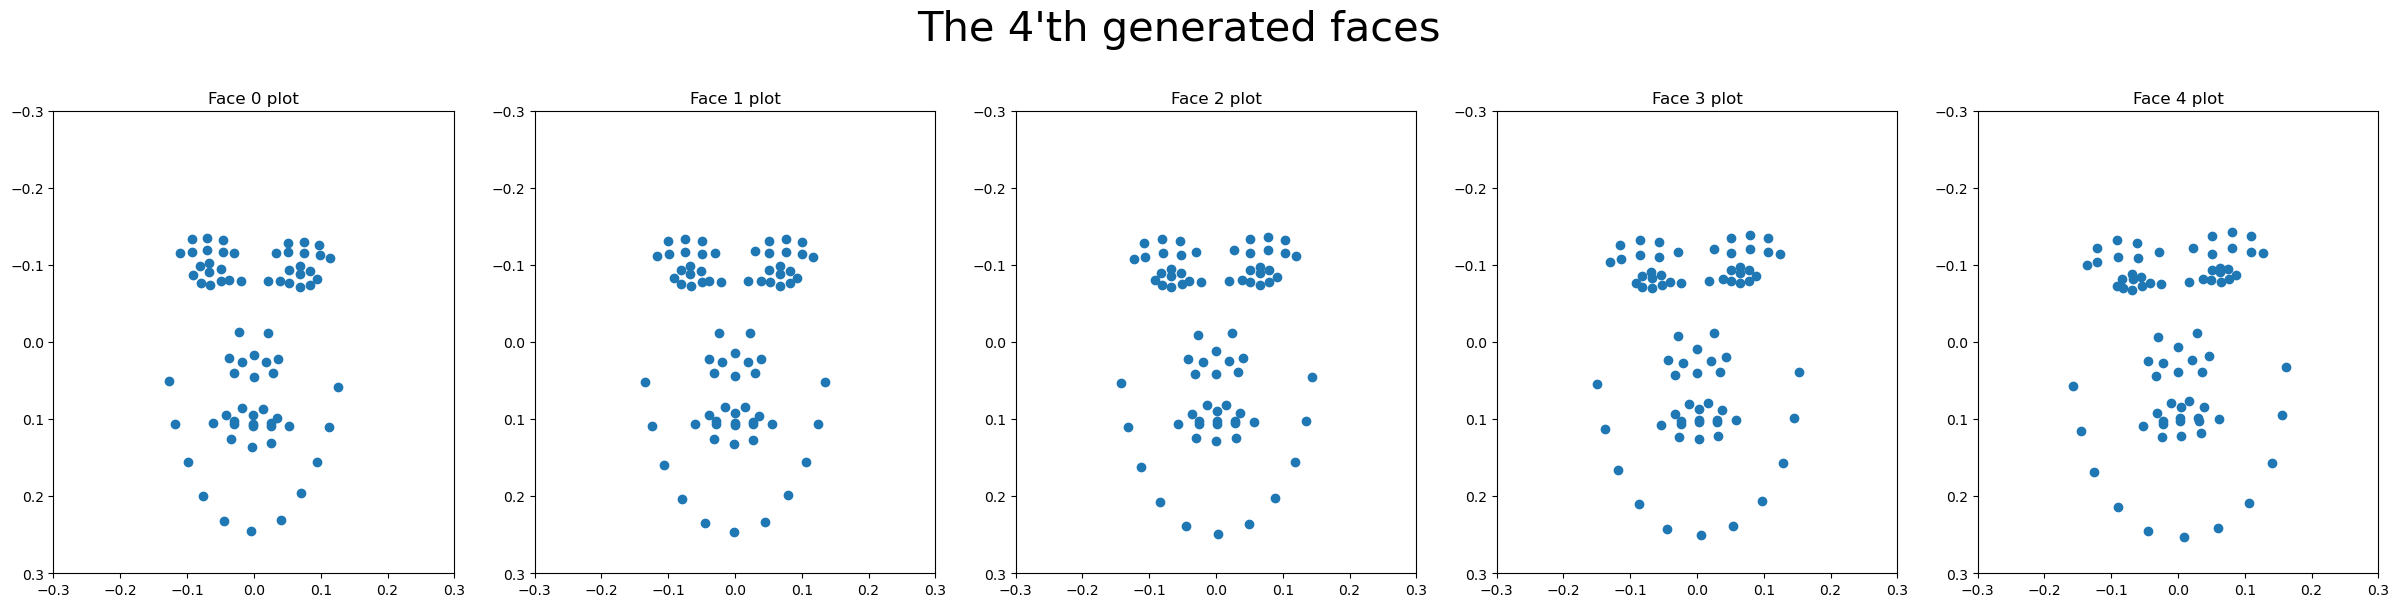

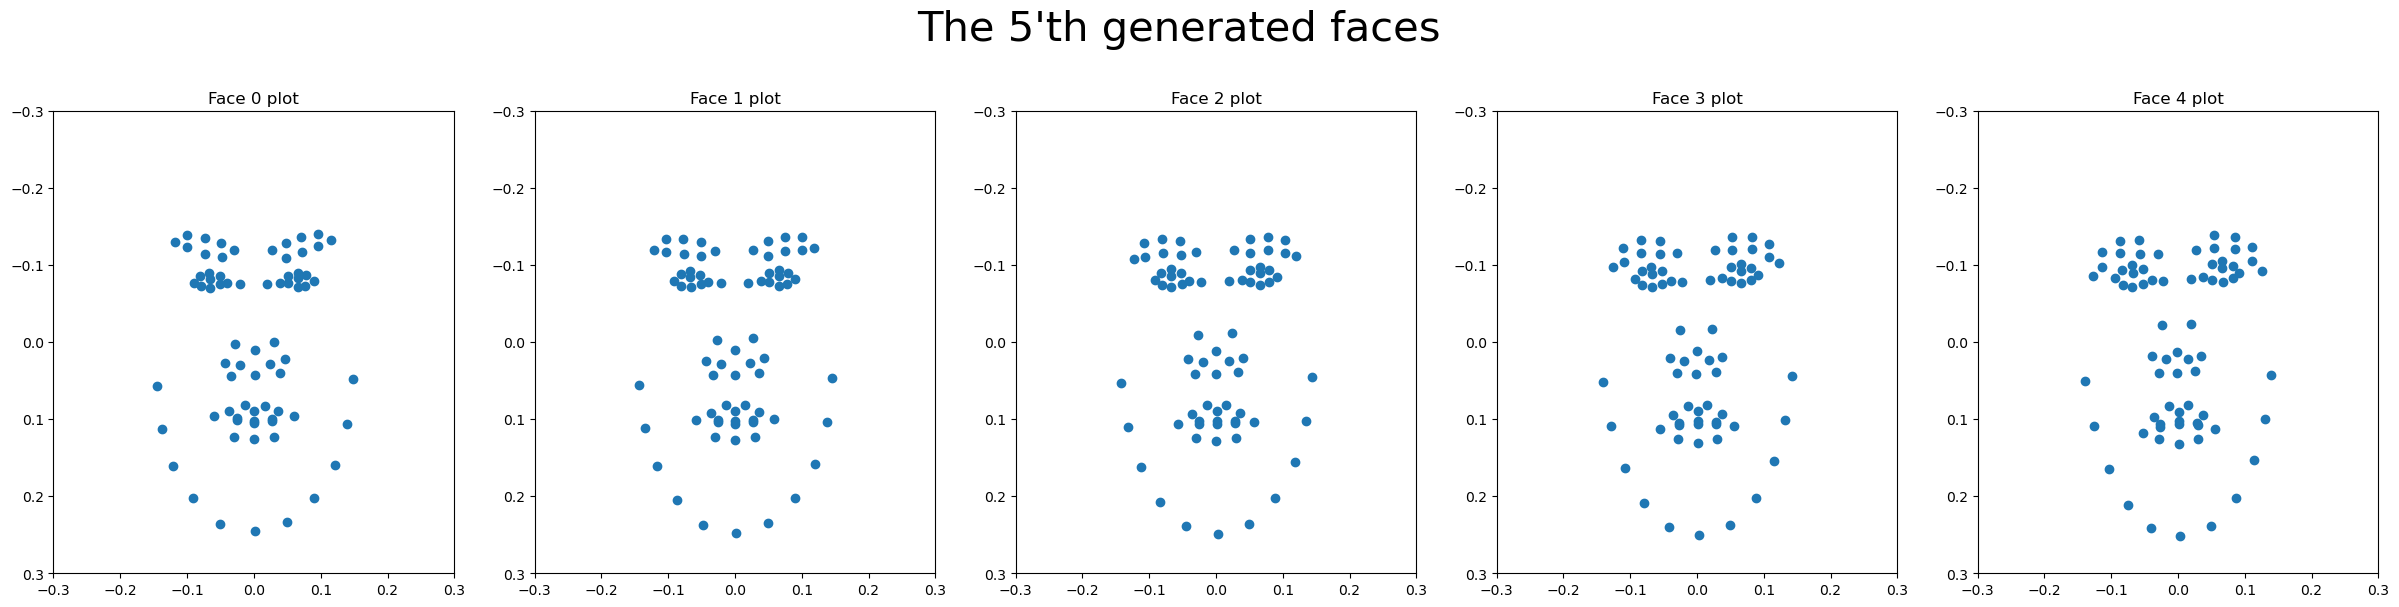

In [28]:
std_1 = np.sqrt(sorted_eigenvalues[0]) # std/eigvalue for the first PC
divitions = np.linspace(-3*std_1, 3*std_1, num=5)



# Write your solution here
ases = [np.array([divitions[i], 0, 0, 0, 0]) for i in range(5)]
gen_shapes = [face_maker(ases[i]) for i in range(5)]


plot_many_faces(gen_shapes,"Generated face shapes by varying the first coordinate in latent space")

def face_maker_2_electric_boogaloo(n):
    std_n = np.sqrt(sorted_eigenvalues[i]) 
    div_n = np.linspace(-3*std_n, 3*std_n, num=5)
    ases = [[0 if n != i else div_n[j] for i in range(5)] for j in range(5)]

    return [face_maker(ases[i]) for i in range(5)]

for i in range(1,5):
    plot_many_faces(face_maker_2_electric_boogaloo(i), f"The {i+1}'th generated faces")

In [0]:
# Write your reflections here

"""
1th comp is length of the face aka how jawlined the people is 
2th comp is the vertical margin between face features
3th comp is the angle of the face
4th comp is width of face
5th comp is the angle of eyebrows
"""

## Interpolating between shapes
The following example shows how to interpolate two vectors.


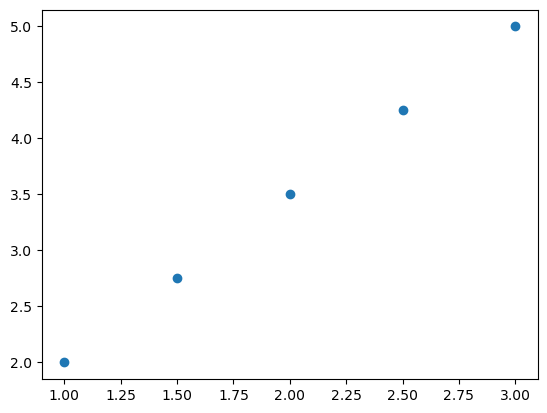

In [29]:
# #Template for doing interpolation between two (2D)- points 
d = np.linspace(np.array([1, 2]), np.array([3, 5]), num=5)
plt.scatter(d[:, 0], d[:, 1])


---
**Task 7 (medium): Interpolation between two faces👩‍💻**
**Shape Interpolation:**
1. Select points $\mathbf{a}$ and $\mathbf{b}$ in latent space (paying attention to the Gaussian constraints) and generate the faces.
2. Use `np.linspace`
 to generate 6 evenly spaced points that interpolate between two vectors, $\mathbf{a}$ and $\mathbf{b}$, in the latent space. Plot the resulting faces. 
3. Select $\mathbf{a}$ and $\mathbf{b}$ such that:    - $\mathbf{a}$ = $[-3\lambda_1,0,-3\lambda_3,0,0]$ and $\mathbf{b}$ = $[3\lambda_1,0,3\lambda_3,0,0]$.
    - $\mathbf{a}$ = $[0,5\lambda_2,0,0,0]$ and $\mathbf{b}$ = $[0,-5\lambda_2,0,0,0]$.
    - the generated shapes represent a smile.




---

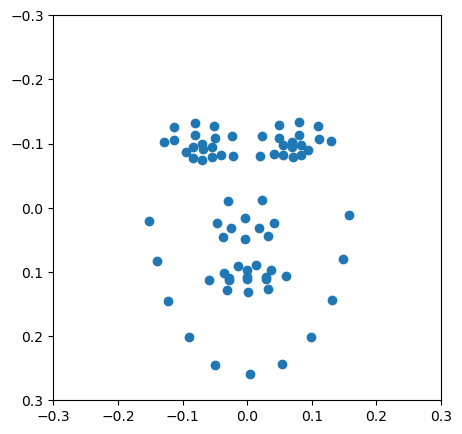

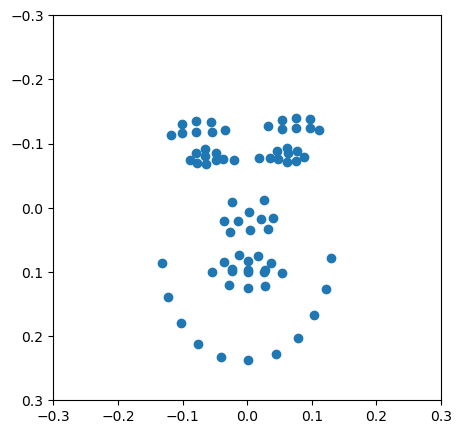

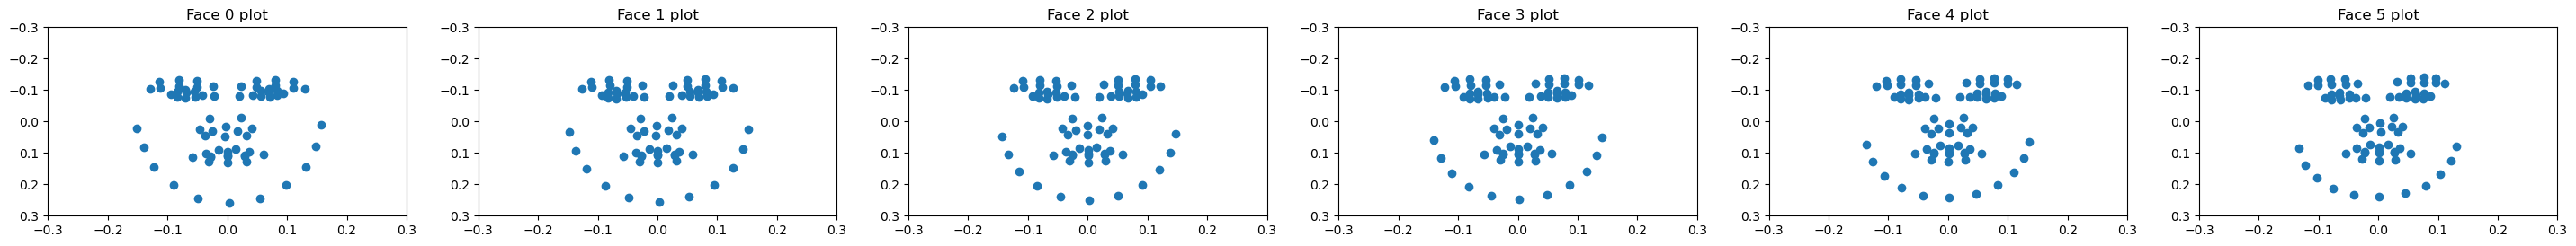

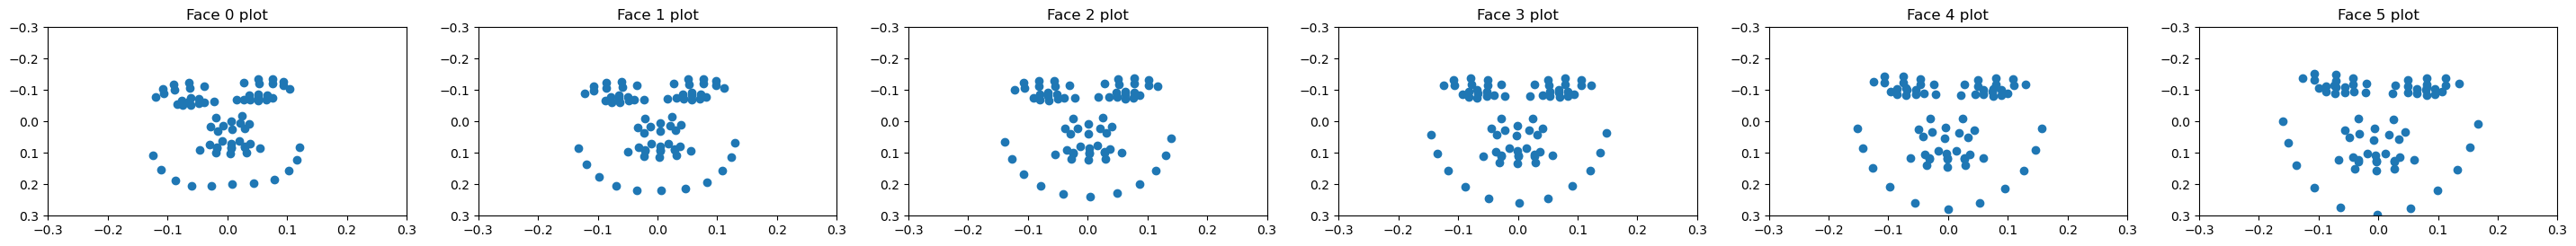

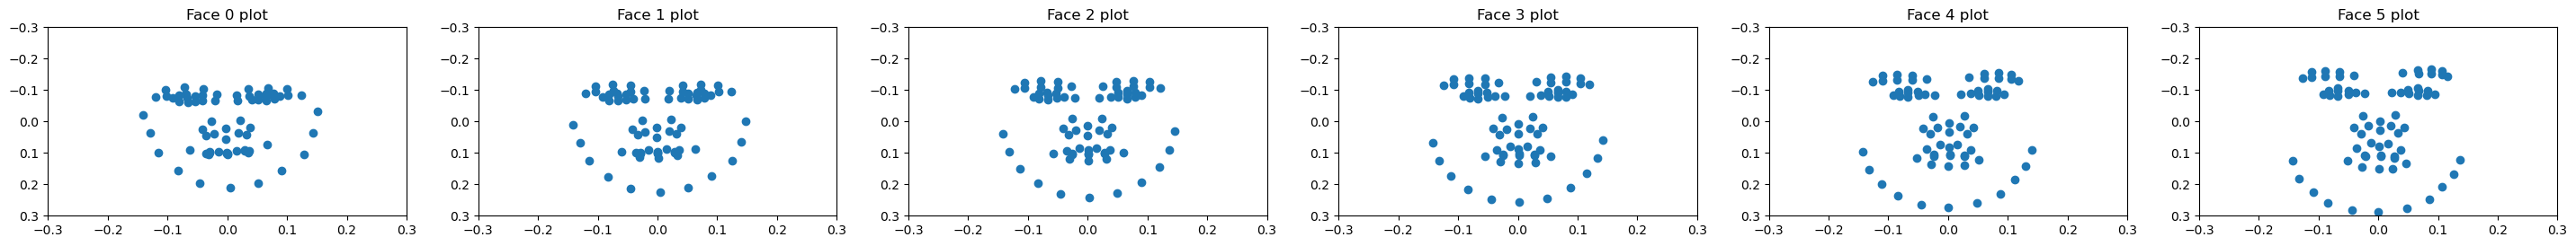

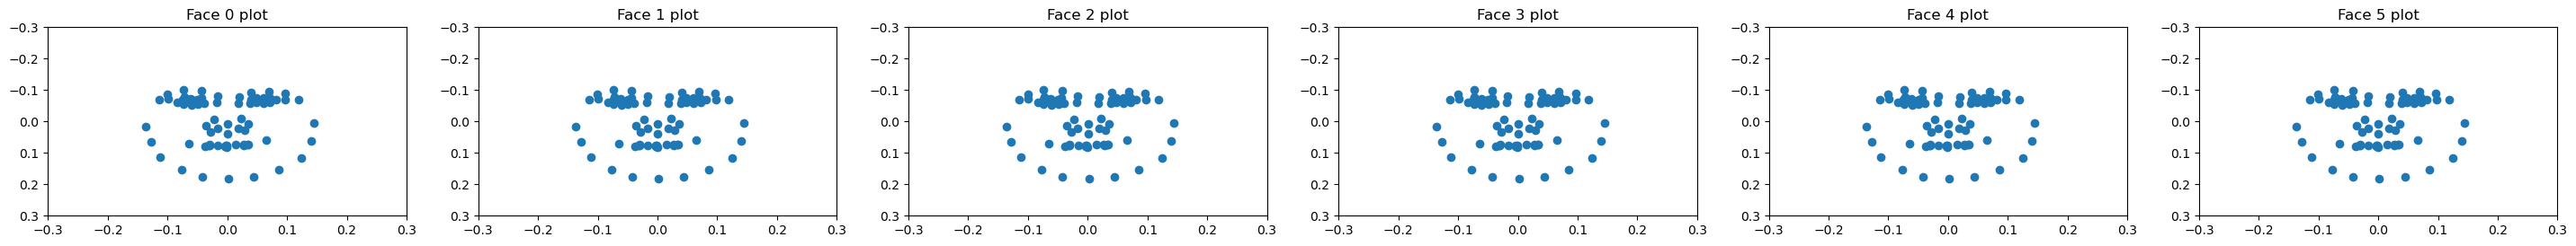

In [ ]:
# write the implementation for "Interpolation between two faces" here
own_a = [np.sqrt(sorted_eigenvalues[0]),
             np.sqrt(sorted_eigenvalues[1]),
             np.sqrt(sorted_eigenvalues[2]),
             np.sqrt(sorted_eigenvalues[3]),
             np.sqrt(sorted_eigenvalues[4])]

own_b = [-1*np.sqrt(sorted_eigenvalues[0]),
             -1*np.sqrt(sorted_eigenvalues[1]),
             -1*np.sqrt(sorted_eigenvalues[2]),
             -1*np.sqrt(sorted_eigenvalues[3]),
             -1*np.sqrt(sorted_eigenvalues[4])]

our_div = np.linspace(own_a,own_b, num=6)

face_off(own_a)
face_off(own_b)

gen_face = [face_maker(i) for i in our_div]
plot_many_faces(gen_face)

a3_neg = [-3*np.sqrt(sorted_eigenvalues[0]), 0, -3*np.sqrt(sorted_eigenvalues[2]), 0, 0]
b3 = [3*np.sqrt(sorted_eigenvalues[0]), 0, 3*np.sqrt(sorted_eigenvalues[2]), 0, 0]

ab3_div = np.linspace(a3_neg, b3, num=6)

gen_face_ab3 = [face_maker(i) for i in ab3_div]

plot_many_faces(gen_face_ab3)

a5 = [0,5*np.sqrt(sorted_eigenvalues[1]), 0, 0, 0]
b5_neg = [0,-5*np.sqrt(sorted_eigenvalues[1]), 0, 0, 0]

ab5_div = np.linspace(a5, b5_neg, num=6)

gen_face_ab5 = [face_maker(i) for i in ab5_div]

plot_many_faces(gen_face_ab5)

true_a = [-2.5*np.sqrt(sorted_eigenvalues[0]), 5*np.sqrt(sorted_eigenvalues[1]),0 ,0 ,-1*np.sqrt(sorted_eigenvalues[4])] 
true_b = true_a

true_div = np.linspace(true_a, true_b, num=6)

the_one_true_face = [face_maker(i) for i in true_div]

plot_many_faces(the_one_true_face) # very important to plot the face 6 times here 



---
**Task 8 (medium): Reflection💡**
Describe and reflect on the results obtained from this assignment, the exercises and the in-class exercises. Answer the following questions:
1. **Behaviour:** Explain why, a set of points interpolated on a line in latent space corresponds to a sample on a line in data space using $x = \Phi\mathbf{a} + \mu$. 
2. How well can a few principal components reproduce the samples? What happens with the generated data when the number of components $k$ is changed to 1,3,9, or 15?


---

In [ ]:
# Write reflections here.
"""
1. Because its a linear transformation from latent space to data space then that means if a set of points is interperlated on a line in latent 
space that means they would also be interperlated on a line in data space.
---
2. You can get away with reseanobly few components whilst still maintaining a significant percentage of the total varience of the data. Based on a assignment 
that we are not handing in (pca intro) we could see through the cummulative varience ratio that around 15 components we still get pretty good total varience
with a lot smaller of a component matrix. 
The generated data gets less detailed with less components (1,3) and a higher amount of data loss. We get more detail and lower data loss with 9 and 15 
respectively
"""

## Last section - optional
This final section includes three tasks that offer valuable insights into the application of PCA, however completing this section is optional.

---
**Task 9 (medium): Eigenvalues and eigenvectors of correlation matrix _(optional)_👩‍💻💡**
1. Implement the function `get_principal_components_correlation`
 according to the comments in the cell below.
2. Use the provided code to display the eigenvalues of the correlation matrix.
3. How do the eigenvalues obtained from the covariance matrix compare to those from the correlation matrix in terms of magnitude and the variance each principal component explains? What does this reveal about the effect of feature scaling on PCA results?


---

In [0]:
def get_principal_components_correlation(X):
    """Calculates principal components using the correlation matrix for X.

    Args:
        X: The dataset. An NxD array where N are the number of samples and D are
        the number of features.

    Returns:
        Tuple (components, eigenvalues, mu) where components is a DxD matrix of
        principal components, eigenvalues is a D-element vector of
        corresponding eigenvalues, and mu is a D-element array containing the mean
        vector.
    """
    # Standardize the data
    
    # Compute the correlation matrix
    
    # Sort the eigenvalues and eigenvectors in descending order
    
    return ....

# Use the function on the shapes data
eigenvectors_corr, eigenvalues_corr, mu_corr = get_principal_components_correlation(shapes)

# Optionally, plot the eigenvalues to see their distribution
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues_corr) + 1), eigenvalues_corr, 'o-', linewidth=2)
plt.title('Eigenvalues of the Correlation Matrix')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

variance_explained = eigenvalues_corr / np.sum(eigenvalues_corr)
cumulative_variance_explained = np.cumsum(variance_explained)

# Plot cumulative variance explained
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1),
         cumulative_variance_explained, 'o-', linewidth=2)
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='--')  # Line to indicate 90% variance
plt.grid(True)
plt.show()


---
**Task 10 (medium): Dimensionality reduction of features _(optional)_👩‍💻💡**
1. **Transform data:** Use $\mathbf{\Phi^{\top}}$​ to transform the data $\mathbf{x}$ into its latent-space representation $\mathbf{x'}$ (using $\mathbf{x'}= \mathbf{\Phi^{\top}}(\mathbf{x}-\mathbf{\mu})$).
2. Plot the first two  components in latent space using a scatterplot.    - What does this plot tell you about the distribution of faces?
    - Try plotting different pairs of components. Describe how each combination separates (clusters) the dataset differently.


3. **Interpolate between real faces:** Re-implement [Task 6](#interpolate) but instead of selecting 2 points in latent space, transform two real faces to latent space and interpolate between them.     - Plot the faces of the interpolated points.




---

In [0]:
# Write implementation here

Describe the different scatter plots of component combinations

---
**Task 11 (medium): Out of distribution generation _(optional)_👩‍💻💡**
1. **Extreme values:** What happens if you select values outside the suggested range. Explain why this happens.


---

In [0]:
# Write implementation and reflections here